  **CROP** **PREDICTION** **USING** **MACHINE** **LEARNING**

 **AIM**:The agriculture plays a dominant role in the growth of the country’s economy.Climate and other environmental changes has become a major threat in the agriculture field. Machine learning (ML) is an essential approach for achieving practical and effective solutions for this problem..Crop Prediction involves predicting the type of crop from available  data like weather parameter,soil parameter and the npk content.This project focus on predicting the type of the crop based on the existing data by using differnt machine learning algorithms.








**INPUT**    
*   N=Nitrogen
*   P=Phosphorus
*   K=Potassium
*   Temperature
*   Humidity
*   pH
*   Rainfall














In [72]:
#load the data set
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/Crop.csv')
df



,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
df.shape

(2200, 8)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2198 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2191 non-null   float64
 3   temperature  2167 non-null   float64
 4   humidity     2138 non-null   float64
 5   ph           2190 non-null   float64
 6   rainfall     2171 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


In [76]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [77]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,104.0,18,30.0,23.603016,60.396475,6.779833,140.937041,coffee


**DATA PREPROCESSING**

In [78]:
df.dtypes # to check the datatypes

N              float64
P                int64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [79]:
#checking missing values
df.isna().sum()

N               2
P               0
K               9
temperature    33
humidity       62
ph             10
rainfall       29
label           0
dtype: int64

In [80]:
#filling missing values
df['N']=df['N'].fillna(df['N'].mode()[0])
df['K']=df['K'].fillna(df['K'].mode()[0])

In [81]:
list=["temperature","humidity","ph","rainfall"]
for i in list:
  df[i]=df[i].fillna(df[i].median())

In [82]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**CHECKING OUTLIERS**

In [83]:
import numpy as np
def detect_outliers_iqr_feature(data,feature):
  feature_data=data[feature]
  Q1=np.percentile(feature_data,25)
  Q3=np.percentile(feature_data,75)
  iqr=Q3-Q1
  lower_bound=Q1-1.5*iqr
  upperbound=Q3+1.5*iqr


In [84]:
name=['N'	,'P'	,'K'	,'temperature'	,'humidity' ,'ph' ,'rainfall']
for i in name:
  outliers=detect_outliers_iqr_feature(df,i)
  print("Outliers are present in",i,":",outliers)

Outliers are present in N : None
Outliers are present in P : None
Outliers are present in K : None
Outliers are present in temperature : None
Outliers are present in humidity : None
Outliers are present in ph : None
Outliers are present in rainfall : None


In [85]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

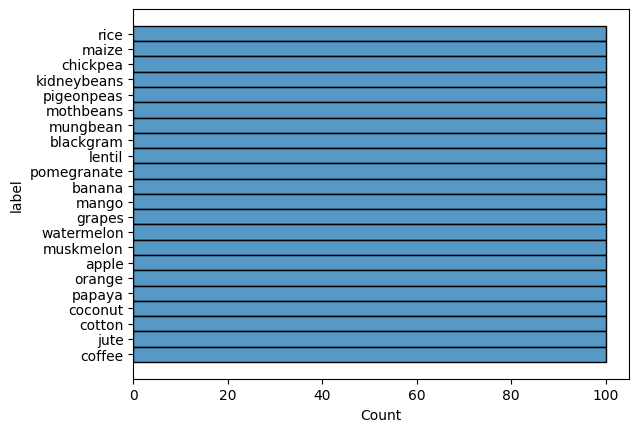

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(y='label', data=df)
plt.show()

In [87]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231649,-0.140502,0.034486,0.182105,0.098634,0.050092
P,-0.231649,1.000000,0.736153,-0.132283,-0.116260,-0.138356,-0.056338
K,-0.140502,0.736153,1.000000,-0.159150,0.187732,-0.170109,-0.045999
temperature,0.034486,-0.132283,-0.159150,1.000000,0.193477,-0.025867,-0.024900
humidity,0.182105,-0.116260,0.187732,0.193477,1.000000,-0.022612,0.095354
ph,0.098634,-0.138356,-0.170109,-0.025867,-0.022612,1.000000,-0.114630
rainfall,0.050092,-0.056338,-0.045999,-0.024900,0.095354,-0.114630,1.000000


**SEPERATE X AND Y**

In [88]:
X=df.iloc[:,:-1]
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293


In [89]:
y=df.iloc[:,-1]
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [90]:
#scaling the dataset

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xsc=sc.fit_transform(X)
Xsc

array([[ 1.07044171, -0.34455075, -0.10104168, ...,  0.46073648,
         0.04232272,  1.82265624],
       [ 0.93495212,  0.14061552, -0.14052862, ...,  0.38330389,
         0.73475896,  2.25727953],
       [ 0.25750414,  0.04964684, -0.08129822, ...,  0.47536722,
         1.77269407,  2.94088973],
       ...,
       [ 1.82918345, -0.61745677, -0.35770676, ..., -0.21912175,
        -0.13932635,  1.28006064],
       [ 1.80208553, -0.64777967, -0.27873289, ..., -0.91370684,
         0.37333852,  0.43449582],
       [ 1.44981258, -1.07230015, -0.35770676, ..., -0.53328009,
         0.40056445,  0.68665334]])

In [92]:
# from sklearn.preprocessing import MinMaxScaler
# mm=MinMaxScaler()
# Xmm=sc.fit_transform(X)
# Xmm

**Train-Test split**

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=.3,random_state=1)

**MODEL CREATION**

In [94]:
#importing the required libraries


In [95]:
pip install catboost

In [96]:
pip install lightgbm

In [97]:
pip install xgboost

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


**1:k-nearest neighbors algorithm**

In [99]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_kn=knn.predict(X_test)
print(accuracy_score(y_test,y_kn)*100)
print(classification_report(y_test,y_kn))

96.36363636363636
              precision    recall  f1-score   support

       apple       0.89      1.00      0.94        31
      banana       1.00      1.00      1.00        28
   blackgram       0.88      1.00      0.94        29
    chickpea       1.00      1.00      1.00        28
     coconut       0.96      1.00      0.98        25
      coffee       1.00      1.00      1.00        28
      cotton       0.90      1.00      0.95        36
      grapes       1.00      0.91      0.95        44
        jute       0.89      1.00      0.94        32
 kidneybeans       1.00      0.94      0.97        33
      lentil       0.86      0.93      0.89        27
       maize       1.00      0.93      0.96        28
       mango       0.91      1.00      0.96        32
   mothbeans       1.00      0.85      0.92        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      0.96      0.98        23
      pap

**2:Support Vector Machine algorithm**





In [100]:
svc=SVC()
svc.fit(X_train,y_train)
y_sv=svc.predict(X_test)
y_sv
print(accuracy_score(y_test,y_sv)*100)
print(classification_report(y_test,y_sv,digits=4))


96.81818181818181
              precision    recall  f1-score   support

       apple     0.9394    1.0000    0.9688        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     0.9333    0.9655    0.9492        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     0.9231    1.0000    0.9600        36
      grapes     1.0000    0.9545    0.9767        44
        jute     0.8205    1.0000    0.9014        32
 kidneybeans     1.0000    0.8788    0.9355        33
      lentil     0.8667    0.9630    0.9123        27
       maize     0.9643    0.9643    0.9643        28
       mango     0.9697    1.0000    0.9846        32
   mothbeans     1.0000    0.9091    0.9524        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

**3:Naïve Bayes algorithm**

In [101]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_nb=nb.predict(X_test)
y_nb
print(accuracy_score(y_test,y_nb)*100)
print(classification_report(y_test,y_nb))

98.7878787878788
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.99        36
      grapes       1.00      1.00      1.00        44
        jute       0.91      0.97      0.94        32
 kidneybeans       0.97      0.94      0.95        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      0.96      0.98        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        23
      papa

**4:Decision tree algorithm**

In [102]:
dt=DecisionTreeClassifier(criterion='gini',random_state=3)
dt.fit(X_train,y_train)
y_dt=dt.predict(X_test)
y_dt
print(accuracy_score(y_test,y_dt)*100)
print(classification_report(y_test,y_dt))

97.42424242424242
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.94      1.00      0.97        29
    chickpea       1.00      1.00      1.00        28
     coconut       0.92      0.96      0.94        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.93      0.81      0.87        32
 kidneybeans       1.00      0.97      0.98        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       0.97      1.00      0.98        32
   mothbeans       1.00      0.97      0.98        33
    mungbean       0.97      1.00      0.99        33
   muskmelon       1.00      0.94      0.97        36
      orange       1.00      1.00      1.00        23
      pap

**5:Adaptive Boosting**

In [103]:
ab=AdaBoostClassifier(random_state=1,learning_rate=.1)
ab.fit(X_train,y_train)
y_ab=ab.predict(X_test)
y_ab
print(accuracy_score(y_test,y_ab)*100)
print(classification_report(y_test,y_ab))

88.03030303030303
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.83      1.00      0.91        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      0.80      0.89        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       1.00      0.03      0.06        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      0.19      0.31        27
       maize       0.97      1.00      0.98        28
       mango       0.70      1.00      0.82        32
   mothbeans       0.55      0.82      0.66        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       0.96      1.00      0.98        23
      pap

**6:Gradient Boosting**

In [104]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_gb=gb.predict(X_test)
y_gb
print(accuracy_score(y_test,y_gb)*100)
print(classification_report(y_test,y_gb,digits=4))

99.0909090909091
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     1.0000    1.0000    1.0000        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     1.0000    1.0000    1.0000        36
      grapes     1.0000    1.0000    1.0000        44
        jute     0.9412    1.0000    0.9697        32
 kidneybeans     1.0000    0.8788    0.9355        33
      lentil     1.0000    1.0000    1.0000        27
       maize     1.0000    1.0000    1.0000        28
       mango     1.0000    1.0000    1.0000        32
   mothbeans     0.9706    1.0000    0.9851        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      papa

**7:CatBoost**

In [105]:
ca=CatBoostClassifier()
ca.fit(X_train,y_train)
y_ca=dt.predict(X_test)
y_ca
print(accuracy_score(y_test,y_ca)*100)
print(classification_report(y_test,y_ca))

Learning rate set to 0.080889
0:	learn: 2.6362300	total: 41.2ms	remaining: 41.2s
1:	learn: 2.3044680	total: 86ms	remaining: 42.9s
2:	learn: 2.0549261	total: 132ms	remaining: 43.8s
3:	learn: 1.8439381	total: 176ms	remaining: 43.9s
4:	learn: 1.6626691	total: 225ms	remaining: 44.8s
5:	learn: 1.5278967	total: 270ms	remaining: 44.8s
6:	learn: 1.4090847	total: 336ms	remaining: 47.7s
7:	learn: 1.3068550	total: 391ms	remaining: 48.5s
8:	learn: 1.1978431	total: 448ms	remaining: 49.3s
9:	learn: 1.1261902	total: 552ms	remaining: 54.6s
10:	learn: 1.0438759	total: 622ms	remaining: 55.9s
11:	learn: 0.9697465	total: 681ms	remaining: 56.1s
12:	learn: 0.9018495	total: 748ms	remaining: 56.8s
13:	learn: 0.8499892	total: 837ms	remaining: 59s
14:	learn: 0.7932456	total: 915ms	remaining: 1m
15:	learn: 0.7428518	total: 977ms	remaining: 1m
16:	learn: 0.7051119	total: 1.02s	remaining: 59s
17:	learn: 0.6666132	total: 1.07s	remaining: 58.6s
18:	learn: 0.6309770	total: 1.13s	remaining: 58.2s
19:	learn: 0.5988064	

**8:Light Gradient Boosting Machine**

In [106]:
li=lgb.LGBMClassifier()
li.fit(X_train,y_train)
y_li=li.predict(X_test)
y_li
print(accuracy_score(y_test,y_li)*100)
print(classification_report(y_test,y_li))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.022050
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -3.314186
[LightGBM] [Info] Start training from score -3.120030
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.120030
[LightGB

**9:RandomForest**

In [107]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
y_rf
print(accuracy_score(y_test,y_rf)*100)
print(classification_report(y_test,y_rf,digits=6))


99.69696969696969
              precision    recall  f1-score   support

       apple   1.000000  1.000000  1.000000        31
      banana   1.000000  1.000000  1.000000        28
   blackgram   1.000000  1.000000  1.000000        29
    chickpea   1.000000  1.000000  1.000000        28
     coconut   1.000000  1.000000  1.000000        25
      coffee   1.000000  1.000000  1.000000        28
      cotton   1.000000  1.000000  1.000000        36
      grapes   1.000000  1.000000  1.000000        44
        jute   0.941176  1.000000  0.969697        32
 kidneybeans   1.000000  1.000000  1.000000        33
      lentil   1.000000  1.000000  1.000000        27
       maize   1.000000  1.000000  1.000000        28
       mango   1.000000  1.000000  1.000000        32
   mothbeans   1.000000  1.000000  1.000000        33
    mungbean   1.000000  1.000000  1.000000        33
   muskmelon   1.000000  1.000000  1.000000        36
      orange   1.000000  1.000000  1.000000        23
      pap

**OVER SAMPLING**

In [108]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [109]:
#scaling
st=StandardScaler()
X_st=st.fit_transform(X_os)
X_st

array([[ 1.07044171, -0.34455075, -0.10104168, ...,  0.46073648,
         0.04232272,  1.82265624],
       [ 0.93495212,  0.14061552, -0.14052862, ...,  0.38330389,
         0.73475896,  2.25727953],
       [ 0.25750414,  0.04964684, -0.08129822, ...,  0.47536722,
         1.77269407,  2.94088973],
       ...,
       [ 1.82918345, -0.61745677, -0.35770676, ..., -0.21912175,
        -0.13932635,  1.28006064],
       [ 1.80208553, -0.64777967, -0.27873289, ..., -0.91370684,
         0.37333852,  0.43449582],
       [ 1.44981258, -1.07230015, -0.35770676, ..., -0.53328009,
         0.40056445,  0.68665334]])

In [110]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X_st,y_os,test_size=.3,random_state=1)

In [111]:
#knn after over sampling
knn1=KNeighborsClassifier()
knn1.fit(X_train,y_train)
y_pred=knn1.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

96.36363636363636
              precision    recall  f1-score   support

       apple       0.89      1.00      0.94        31
      banana       1.00      1.00      1.00        28
   blackgram       0.88      1.00      0.94        29
    chickpea       1.00      1.00      1.00        28
     coconut       0.96      1.00      0.98        25
      coffee       1.00      1.00      1.00        28
      cotton       0.90      1.00      0.95        36
      grapes       1.00      0.91      0.95        44
        jute       0.89      1.00      0.94        32
 kidneybeans       1.00      0.94      0.97        33
      lentil       0.86      0.93      0.89        27
       maize       1.00      0.93      0.96        28
       mango       0.91      1.00      0.96        32
   mothbeans       1.00      0.85      0.92        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      0.96      0.98        23
      pap

In [112]:
#svc after oversampling
svc=SVC()
svc.fit(X_train,y_train)
y_ps=svc.predict(X_test)
print(accuracy_score(y_test,y_ps)*100)
print(classification_report(y_test,y_ps,digits=4))


96.81818181818181
              precision    recall  f1-score   support

       apple     0.9394    1.0000    0.9688        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     0.9333    0.9655    0.9492        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     0.9231    1.0000    0.9600        36
      grapes     1.0000    0.9545    0.9767        44
        jute     0.8205    1.0000    0.9014        32
 kidneybeans     1.0000    0.8788    0.9355        33
      lentil     0.8667    0.9630    0.9123        27
       maize     0.9643    0.9643    0.9643        28
       mango     0.9697    1.0000    0.9846        32
   mothbeans     1.0000    0.9091    0.9524        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

In [113]:
#naive bayes after oversampling
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_gnb=gnb.predict(X_test)
print(accuracy_score(y_test,y_gnb)*100)
print(classification_report(y_test,y_gnb,digits=5))

98.7878787878788
              precision    recall  f1-score   support

       apple    1.00000   1.00000   1.00000        31
      banana    1.00000   1.00000   1.00000        28
   blackgram    1.00000   1.00000   1.00000        29
    chickpea    1.00000   1.00000   1.00000        28
     coconut    1.00000   1.00000   1.00000        25
      coffee    1.00000   1.00000   1.00000        28
      cotton    0.97297   1.00000   0.98630        36
      grapes    1.00000   1.00000   1.00000        44
        jute    0.91176   0.96875   0.93939        32
 kidneybeans    0.96875   0.93939   0.95385        33
      lentil    1.00000   1.00000   1.00000        27
       maize    1.00000   0.96429   0.98182        28
       mango    1.00000   1.00000   1.00000        32
   mothbeans    1.00000   1.00000   1.00000        33
    mungbean    1.00000   1.00000   1.00000        33
   muskmelon    1.00000   1.00000   1.00000        36
      orange    1.00000   1.00000   1.00000        23
      papa

In [114]:
#decision tree after oversampling
dd=DecisionTreeClassifier()
dd.fit(X_train,y_train)
y_dd=dd.predict(X_test)
print(accuracy_score(y_test,y_dd)*100)
print(classification_report(y_test,y_dd,digits=5))

97.57575757575758
              precision    recall  f1-score   support

       apple    1.00000   1.00000   1.00000        31
      banana    1.00000   1.00000   1.00000        28
   blackgram    0.96667   1.00000   0.98305        29
    chickpea    1.00000   1.00000   1.00000        28
     coconut    0.92593   1.00000   0.96154        25
      coffee    1.00000   1.00000   1.00000        28
      cotton    1.00000   1.00000   1.00000        36
      grapes    1.00000   1.00000   1.00000        44
        jute    0.89286   0.78125   0.83333        32
 kidneybeans    1.00000   0.96970   0.98462        33
      lentil    1.00000   1.00000   1.00000        27
       maize    1.00000   1.00000   1.00000        28
       mango    1.00000   1.00000   1.00000        32
   mothbeans    1.00000   0.96970   0.98462        33
    mungbean    0.97059   1.00000   0.98507        33
   muskmelon    1.00000   0.94444   0.97143        36
      orange    1.00000   1.00000   1.00000        23
      pap

In [115]:
#adaboost after oversampling
ada=AdaBoostClassifier(random_state=1,learning_rate=.1)
ada.fit(X_train,y_train)
y_ada=ada.predict(X_test)
print(accuracy_score(y_test,y_ada)*100)
print(classification_report(y_test,y_ada))

88.03030303030303
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.83      1.00      0.91        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      0.80      0.89        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       1.00      0.03      0.06        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      0.19      0.31        27
       maize       0.97      1.00      0.98        28
       mango       0.70      1.00      0.82        32
   mothbeans       0.55      0.82      0.66        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       0.96      1.00      0.98        23
      pap

In [116]:
# gradient boosting oversampling
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_gr=gr.predict(X_test)
print(accuracy_score(y_test,y_gr)*100)
print(classification_report(y_test,y_gr,digits=4))

98.93939393939394
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     1.0000    1.0000    1.0000        29
    chickpea     1.0000    0.9643    0.9818        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     1.0000    1.0000    1.0000        36
      grapes     1.0000    1.0000    1.0000        44
        jute     0.9412    1.0000    0.9697        32
 kidneybeans     0.9667    0.8788    0.9206        33
      lentil     1.0000    1.0000    1.0000        27
       maize     1.0000    1.0000    1.0000        28
       mango     1.0000    1.0000    1.0000        32
   mothbeans     0.9706    1.0000    0.9851        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

In [117]:
#catboost after oversampling
ct=CatBoostClassifier()
ct.fit(X_train,y_train)
y_ct=ct.predict(X_test)
print(accuracy_score(y_test,y_ct)*100)

print(classification_report(y_test,y_ct,digits=4))

Learning rate set to 0.080889
0:	learn: 2.6362300	total: 69ms	remaining: 1m 8s
1:	learn: 2.3044680	total: 119ms	remaining: 59.3s
2:	learn: 2.0549261	total: 166ms	remaining: 55.2s
3:	learn: 1.8439381	total: 213ms	remaining: 53s
4:	learn: 1.6626691	total: 261ms	remaining: 51.9s
5:	learn: 1.5278967	total: 306ms	remaining: 50.6s
6:	learn: 1.4090847	total: 354ms	remaining: 50.2s
7:	learn: 1.3068550	total: 400ms	remaining: 49.6s
8:	learn: 1.1978431	total: 448ms	remaining: 49.4s
9:	learn: 1.1261902	total: 494ms	remaining: 48.9s
10:	learn: 1.0438759	total: 544ms	remaining: 49s
11:	learn: 0.9697465	total: 593ms	remaining: 48.8s
12:	learn: 0.9018495	total: 643ms	remaining: 48.8s
13:	learn: 0.8499892	total: 694ms	remaining: 48.9s
14:	learn: 0.7932456	total: 739ms	remaining: 48.5s
15:	learn: 0.7428518	total: 784ms	remaining: 48.2s
16:	learn: 0.7051119	total: 834ms	remaining: 48.2s
17:	learn: 0.6666132	total: 890ms	remaining: 48.6s
18:	learn: 0.6309770	total: 944ms	remaining: 48.7s
19:	learn: 0.598

In [118]:
#lgb after oversampling
lb=lgb.LGBMClassifier()
lb.fit(X_train,y_train)
y_lb=lb.predict(X_test)
print(accuracy_score(y_test,y_lb)*100)
print(classification_report(y_test,y_lb))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.022050
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -3.314186
[LightGBM] [Info] Start training from score -3.120030
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.120030
[LightGB

In [119]:
#random forest after oversampling
ra=RandomForestClassifier(random_state=1)
ra.fit(X_train,y_train)
y_ra=ra.predict(X_test)
print(accuracy_score(y_test,y_ra)*100)
print(classification_report(y_test,y_ra,digits=4))

99.69696969696969
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     1.0000    1.0000    1.0000        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     1.0000    1.0000    1.0000        36
      grapes     1.0000    1.0000    1.0000        44
        jute     0.9412    1.0000    0.9697        32
 kidneybeans     1.0000    1.0000    1.0000        33
      lentil     1.0000    1.0000    1.0000        27
       maize     1.0000    1.0000    1.0000        28
       mango     1.0000    1.0000    1.0000        32
   mothbeans     1.0000    1.0000    1.0000        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

**HYPER PARAMETER TUNING**

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
#before hyper parameter tuning of knn
knh=KNeighborsClassifier()
params_knh={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knh,params_knh,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [122]:
#after hyper parameter tuning of knn
knh1=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
knh1.fit(X_train,y_train)
y_knh1=knh1.predict(X_test)
print(accuracy_score(y_test,y_knh1)*100)
print(classification_report(y_test,y_knh1,digits=4))


96.66666666666667
              precision    recall  f1-score   support

       apple     0.9118    1.0000    0.9538        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     0.8788    1.0000    0.9355        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     0.9615    1.0000    0.9804        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     0.8974    0.9722    0.9333        36
      grapes     1.0000    0.9318    0.9647        44
        jute     0.8889    1.0000    0.9412        32
 kidneybeans     1.0000    0.9394    0.9688        33
      lentil     0.8929    0.9259    0.9091        27
       maize     0.9630    0.9286    0.9455        28
       mango     0.9697    1.0000    0.9846        32
   mothbeans     1.0000    0.8788    0.9355        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    0.9565    0.9778        23
      pap

In [123]:
#svc before hyper paramter tuning
svh=SVC()
params_svh={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}
clf1=GridSearchCV(svh,params_svh,cv=5,scoring='accuracy')
clf1.fit(X_train,y_train)
clf1.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [124]:
#svc after hyper parameter tuning
svh1=SVC(kernel='linear',gamma='scale')
svh1.fit(X_train,y_train)
y_pred_sv=svh1.predict(X_test)
print(accuracy_score(y_test,y_pred_sv)*100)
print(classification_report(y_test,y_pred_sv,digits=4))

96.51515151515152
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     0.9062    1.0000    0.9508        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     0.9474    1.0000    0.9730        36
      grapes     1.0000    1.0000    1.0000        44
        jute     0.8333    0.9375    0.8824        32
 kidneybeans     0.9286    0.7879    0.8525        33
      lentil     0.9630    0.9630    0.9630        27
       maize     0.9643    0.9643    0.9643        28
       mango     1.0000    1.0000    1.0000        32
   mothbeans     1.0000    0.9697    0.9846        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

In [125]:
#hyper parameter tuning of randomforest classifier
rfh=RandomForestClassifier()
params_rf={'n_estimators':[50,75,100,125,150],'criterion':['entropy','gini']}
clf2=GridSearchCV(rfh,params_rf,cv=5,scoring='accuracy')
clf2.fit(X_train,y_train)
clf2.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

In [126]:
#after hyper parameter tuning of random forest
rfh1=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
rfh1.fit(X_train,y_train)
y_pred_rf=rfh1.predict(X_test)
print(accuracy_score(y_test,y_pred_rf)*100)
print(classification_report(y_test,y_pred_rf,digits=4))

99.39393939393939
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        28
   blackgram     0.9667    1.0000    0.9831        29
    chickpea     1.0000    1.0000    1.0000        28
     coconut     1.0000    1.0000    1.0000        25
      coffee     1.0000    1.0000    1.0000        28
      cotton     1.0000    1.0000    1.0000        36
      grapes     1.0000    1.0000    1.0000        44
        jute     0.9412    1.0000    0.9697        32
 kidneybeans     1.0000    0.9697    0.9846        33
      lentil     1.0000    1.0000    1.0000        27
       maize     1.0000    1.0000    1.0000        28
       mango     1.0000    1.0000    1.0000        32
   mothbeans     1.0000    0.9697    0.9846        33
    mungbean     1.0000    1.0000    1.0000        33
   muskmelon     1.0000    1.0000    1.0000        36
      orange     1.0000    1.0000    1.0000        23
      pap

**FEATURE EXTRACTION - PRINCIPLE COMPONENT ANALYSIS**

In [127]:
#PRINCIPLE COMPONENT ANALYSIS OF RANDOM FOREST CLASSIFICATION
pca=PCA(n_components=7,random_state=1)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [128]:
#RANDOM FOREST CLASSIFICATION AFTER PRINCIPLE COMPONENT ANALYSIS
rf4=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
rf4.fit(X_train,y_train)
y_pred_pca=rf4.predict(X_test)
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.90      0.97      0.93        29
    chickpea       1.00      1.00      1.00        28
     coconut       0.96      1.00      0.98        25
      coffee       1.00      1.00      1.00        28
      cotton       0.95      1.00      0.97        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      0.94      0.94        32
 kidneybeans       1.00      0.82      0.90        33
      lentil       0.87      0.96      0.91        27
       maize       0.96      0.96      0.96        28
       mango       0.97      0.97      0.97        32
   mothbeans       1.00      0.91      0.95        33
    mungbean       0.94      1.00      0.97        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      0.96      0.98        23
      papaya       0.94    

In [129]:
dataset=pd.DataFrame({'without_oversampling':[96,96,93,97,88,91,97,99,99],'oversampling':[96,96,98,97,88,98,99,99,99],'hyper_parameter_tuning':[96,96,0,0,0,0,0,0,99]},
   index=['KNeighborsClassifier','SupportVectorClassifier','NaiveBayesClassifier','DicisionTreeClassifier','AdaBoostClassifier','Gradient boosting','Catboost','LGBM','RandomForestClassifier'])
dataset

,without_oversampling,oversampling,hyper_parameter_tuning
KNeighborsClassifier,96,96,96
SupportVectorClassifier,96,96,96
NaiveBayesClassifier,93,98,0
DicisionTreeClassifier,97,97,0
AdaBoostClassifier,88,88,0
Gradient boosting,91,98,0
Catboost,97,99,0
LGBM,99,99,0
RandomForestClassifier,99,99,99


Text(0.5, 1.0, 'ALGORITHMS VS ACCURACY')

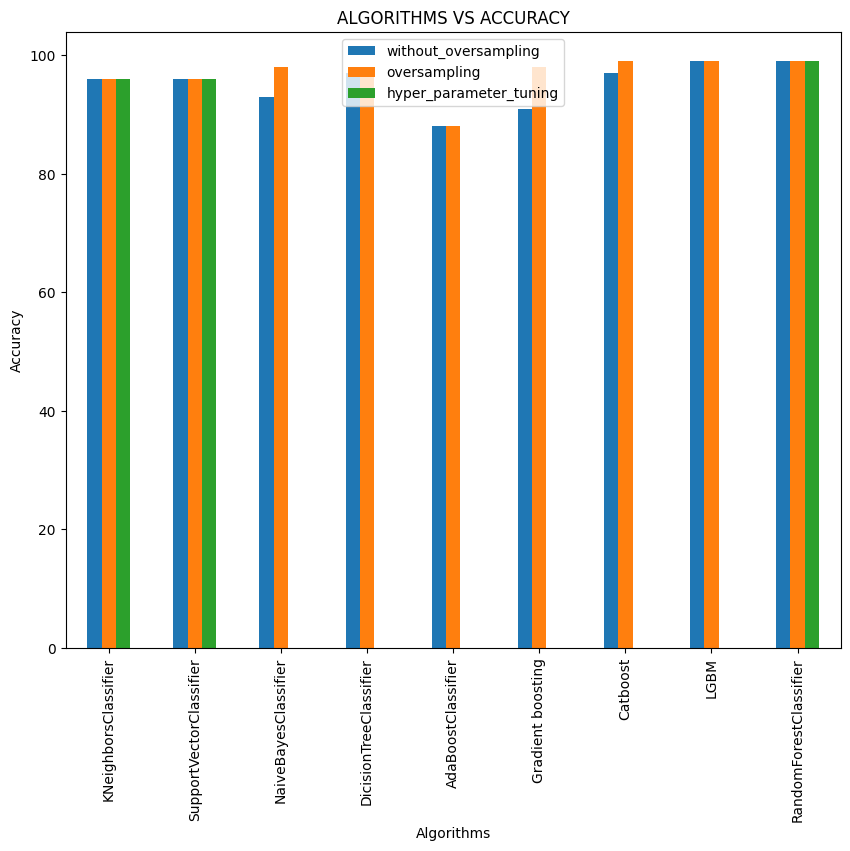

In [130]:
dataset.plot(kind='bar',figsize=(10,8))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('ALGORITHMS VS ACCURACY')

**CONCLUSION**

From the above observations it's clear that random forest algorithm and lgbm shows the highest accuracy .

**SAVING THE MODEL**



In [131]:
import pickle

In [132]:
pickle.dump(rf,open('/content/crop_model','wb'))

In [133]:
pickle.dump(sc,open('/content/crop_scaler','wb'))

In [134]:
model_loaded=pickle.load(open('/content/crop_model','rb'))

In [135]:
scaler=pickle.load(open('/content/crop_scaler','rb'))


In [136]:
y_new=model_loaded.predict(scaler.transform([[90.0,	42,	43.0,	20.879744,	82.002744,	6.502985,	202.935536]]))
if y_new=='rice':
  print("The crop is rice")
elif y_new=='maize':
  print("The crop is maize")
elif y_new=='jute':
  print("The crop is jute")
elif y_new=='cotton':
  print("The crop is cotton")
elif y_new=='coconut':
  print("The crop is coconut")
elif y_new=='papaya':
  print("The crop is papaya")
elif y_new=='orange':
  print("The crop is orange")
elif y_new=='apple':
  print("The crop is apple")
elif y_new=='muskmelon':
  print("The crop is muskmelon")
elif y_new=='watermelon':
  print("The crop is watermelon")
elif y_new=='grapes':
  print("The crop is grapes")
elif y_new=='mango':
  print("The crop is mango")
elif y_new=='banana':
  print("The crop is banana")
elif y_new=='pomegranate':
  print("The crop is pomegranate")
elif y_new=='lentil':
  print("The crop is lentil")
elif y_new=='blackgram':
  print("The crop is blackgram")
elif y_new=='mungbean':
  print("The crop is mungbean")
elif y_new=='pigeonpeas':
  print("The crop is kidney beans")
elif y_new=='chickpea':
  print("The crop is chickpea")
else:
  print("The crop is coffee")

The crop is rice
